## Phase 1: Case

The dataset is available on [Kaggle](https://www.kaggle.com/residentmario/ramen-ratings). It was webscraped from [theramenrater](https://theramenrater.com). From the documentation:
> The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. This dataset is an export of "The Big List" (of reviews), converted to a CSV format.

Points of curiosity are below:
1. What are the best brands of instant ramen?
2. Due to higher demand, do Asian brands make better products?
3. Does packaging affect the experience of eating?
4. Is it easy enough to find high quality ramen?
5. Can we classify whether a product is in the ramen hall of fame?
    * This will be answered by building classifiers.

### Set up workspace

In [1]:
#Standard and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

#Classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split

#Ensemble methods
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('ramen-ratings.csv', index_col='Review #')
df.head()

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
df.shape

(2580, 6)

In [4]:
df.describe(include='all')

,Brand,Variety,Style,Country,Stars,Top Ten
count,2580,2580,2578,2580,2580,41
unique,355,2413,7,38,51,38
top,Nissin,Chicken,Pack,Japan,4,\n
freq,381,7,1531,352,384,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 2580 to 1
Data columns (total 6 columns):
Brand      2580 non-null object
Variety    2580 non-null object
Style      2578 non-null object
Country    2580 non-null object
Stars      2580 non-null object
Top Ten    41 non-null object
dtypes: object(6)
memory usage: 141.1+ KB


#### Observation
1. There are 2580 observations in the original dataset.
2. There are null values in `Style` and `Top Ten`.
3. `Stars` is read as objects instead of numeric.

## Phase 2: Data Cleaning

### Brand

In [6]:
#Inspect unique values
df['Brand'].value_counts().sort_index()

1 To 3 Noodles          1
7 Select                2
7 Select/Nissin         1
A-One                   4
A-Sha Dry Noodle       26
A1                      3
ABC                    12
Acecook                15
Adabi                   4
Ah Lai                  2
Ajinatori               2
Amianda                10
Amino                   3
Annie Chun's           12
Aroi                    2
Asia Gold               4
Asian Thai Foods       14
Authentically Asian     1
Azami                   5
Baijia                 11
Baixiang Noodles        5
Baltix                  2
Bamee                   5
Batchelors             16
Binh Tay                3
Bon Go Jang             2
Bonasia                 4
Boss                    1
CJ CheilJedang          2
Campbell's              3
                       ..
Unzen                   1
Urban Noodle            5
Ve Wong                24
Vedan                   6
Vifon                  33
Vina Acecook           34
Vit's                  13
Wai Wai     

In [7]:
brand_1 = df['Brand'].nunique() ; brand_1

355

There are 355 unique entries but some entries are the same, only with different spelling, use of `-`, and/or capitalization.

In [8]:
#Capitalize all values
df['Brand'] = df['Brand'].str.upper()

#Confirm that unique values are reduced
brand_2 = df['Brand'].nunique()

print('original unique values: %d') % brand_1
print('unique values after capitalization: %d') % brand_2

original unique values: 355
unique values after capitalization: 353


In [9]:
#Replace `-` with ` `
df['Brand'] = df['Brand'].str.replace('-', ' ')

#Confirm that unique values are reduced
brand_3 = df['Brand'].nunique()

print('original unique values: %d') % brand_1
print('unique values after capitalization: %d') % brand_2
print('unique values after replacing "-": %d') % brand_3

original unique values: 355
unique values after capitalization: 353
unique values after replacing "-": 351


Inspect similar-sounding brand names based on:
1. country
2. style
3. stars

In [10]:
sorted(df['Brand'].unique())

['1 TO 3 NOODLES',
 '7 SELECT',
 '7 SELECT/NISSIN',
 'A ONE',
 'A SHA DRY NOODLE',
 'A1',
 'ABC',
 'ACECOOK',
 'ADABI',
 'AH LAI',
 'AJINATORI',
 'AMIANDA',
 'AMINO',
 "ANNIE CHUN'S",
 'AROI',
 'ASIA GOLD',
 'ASIAN THAI FOODS',
 'AUTHENTICALLY ASIAN',
 'AZAMI',
 'BAIJIA',
 'BAIXIANG NOODLES',
 'BALTIX',
 'BAMEE',
 'BATCHELORS',
 'BINH TAY',
 'BON GO JANG',
 'BONASIA',
 'BOSS',
 "CAMPBELL'S",
 'CAP ATOOM BULAN',
 'CARJEN',
 "CHAUDHARY'S WAI WAI",
 'CHENCUN',
 'CHERING CHANG',
 'CHEWY',
 'CHIKARA',
 'CHINA BEST',
 "CHING'S SECRET",
 'CHORIP DONG',
 'CHORIPDONG',
 'CHOUMAMA',
 'CHUAN WEI WANG',
 'CINTAN',
 'CJ CHEILJEDANG',
 'CONIMEX',
 'CRYSTAL NOODLE',
 'CURRY PRINCE',
 'DADDY',
 'DAIFUKU',
 'DAIKOKU',
 'DARAZ',
 'DESHOME',
 'DOLL',
 'DONGWON',
 "DR. MCDOUGALL'S",
 'DRAGONFLY',
 'DREAM KITCHEN',
 'E MI',
 'E ZEE',
 'EAT & GO',
 'ECONSAVE',
 'EMART',
 'FANTASTIC',
 "FARMER'S HEART",
 'FASHION FOOD',
 'FASHION FOODS',
 'FMF',
 'FOODMON',
 'FOREST NOODLES',
 'FORTUNE',
 'FOUR SEAS',
 'FU C

In [11]:
df[(df['Brand'].str.contains('7 SELECT')) | (df['Brand'].str.contains('SEVEN ELEVEN'))]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2124,7 SELECT,Nissin Instant Noodles Tom Yum Seafood Creamy ...,Bowl,Thailand,3.5,NaN
2117,7 SELECT,Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...,Bowl,Thailand,4,NaN
1703,7 SELECT/NISSIN,Super Tom Yum Shrimp,Cup,Thailand,3.5,NaN
830,SEVEN ELEVEN,Seven & I Shoyu,Cup,Japan,4.5,NaN


`7 SELECT` and `7 SELECT/NISSIN` are the same but `SEVEN-ELEVEN` is different from them. 

In [12]:
#Change values to `7 SELECT`-
df['Brand'][df['Brand'].str.contains('7 SELECT')] = '7 SELECT'

#Veify that values were changed
df[df['Brand'].str.contains('7 SELECT')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2124,7 SELECT,Nissin Instant Noodles Tom Yum Seafood Creamy ...,Bowl,Thailand,3.5,NaN
2117,7 SELECT,Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...,Bowl,Thailand,4,NaN
1703,7 SELECT,Super Tom Yum Shrimp,Cup,Thailand,3.5,NaN


In [13]:
df[(df['Brand'] == 'A ONE') | (df['Brand'] == 'A1')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2038,A1,Vegetarian Herbal Noodle,Pack,Malaysia,1.5,NaN
1792,A1,Soup Spices Noodle Mee Rempahan Sup,Pack,Malaysia,3.5,NaN
1676,A1,Emporer Herbs Chicken Noodle,Pack,Malaysia,4.25,NaN
1669,A ONE,Mi Ly Instant Noodles Mi Chay Vegetarian Flavor,Cup,Vietnam,1.25,NaN
1633,A ONE,Mi Ly Instant Noodles Mi Bo Beef Flavor,Cup,Vietnam,3.5,NaN
1564,A ONE,Mì Ly Instant Noodles Mì Thịt Xào Pork Flavor,Cup,Vietnam,3,NaN
1291,A ONE,Mì Ly Instant Noodles Mì Tôm Shrimp Flavor,Cup,Vietnam,3.25,NaN


In [14]:
df[df['Brand'].str.contains('FASHION FOOD')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2432,FASHION FOOD,Yummy Spicy Rice Soup With Seafood,Bowl,Thailand,3.5,NaN
2235,FASHION FOOD,Tom Yum Shrimp Creamy Flavour Instant Noodles,Bowl,Thailand,4,NaN
768,FASHION FOODS,Oriental,Bowl,Thailand,0.25,NaN
767,FASHION FOODS,Mushroom Vegetarian,Bowl,Thailand,1.75,NaN
766,FASHION FOODS,Beef Pho,Bowl,Thailand,3.75,NaN
631,FASHION FOODS,XO Sauce,Bowl,Thailand,1.25,NaN
242,FASHION FOODS,Tom Klong,Bowl,Thailand,2,NaN
92,FASHION FOOD,Tom Yum Seafood Creamy,Bowl,Thailand,2,NaN


In [15]:
#Change values to `FASHION FOOD`-- the correct name based on their website
df['Brand'][df['Brand'].str.contains('FASHION FOOD')] = 'FASHION FOOD'

#Veify that values were changed
df[df['Brand'].str.contains('FASHION FOOD')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2432,FASHION FOOD,Yummy Spicy Rice Soup With Seafood,Bowl,Thailand,3.5,NaN
2235,FASHION FOOD,Tom Yum Shrimp Creamy Flavour Instant Noodles,Bowl,Thailand,4,NaN
768,FASHION FOOD,Oriental,Bowl,Thailand,0.25,NaN
767,FASHION FOOD,Mushroom Vegetarian,Bowl,Thailand,1.75,NaN
766,FASHION FOOD,Beef Pho,Bowl,Thailand,3.75,NaN
631,FASHION FOOD,XO Sauce,Bowl,Thailand,1.25,NaN
242,FASHION FOOD,Tom Klong,Bowl,Thailand,2,NaN
92,FASHION FOOD,Tom Yum Seafood Creamy,Bowl,Thailand,2,NaN


In [16]:
df[df['Brand'].str.startswith('GOLDEN')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1364,GOLDEN WHEAT,Korean Style Stew Pork Flavour Noodle Soup,Bowl,China,1.75,NaN
1323,GOLDEN WHEAT,Korean Style Mushroom Chicken Flavour Cooking ...,Pack,China,2,NaN
1208,GOLDEN WHEAT,Korean Style Stew Prok Flavour Cooking Noodle,Pack,China,3.5,NaN
1157,GOLDEN WONDER,The Nation's Noodle Beef & Tomato Flavour,Cup,UK,4.25,NaN
1154,GOLDEN WHEAT,Korean Style Shrimp Flavour Cooking Noodle,Pack,China,3.5,NaN
1111,GOLDEN WHEAT,Korean Style Stew Beef Cooking Noodle,Pack,China,3.25,NaN
1036,GOLDEN WHEAT,Korean Style Spicy Shrimp Noodle Soup,Bowl,China,3.5,NaN
1010,GOLDEN WHEAT,Korean Style Spicy Beef Noodle Soup,Bowl,China,3.75,NaN
880,GOLDEN WHEAT,South Korean Style Seafood,Cup,China,2.75,NaN


In [17]:
df[df['Brand'].str.contains('HUA FENG')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2388,HUA FENG,Three Fresh Delicacies Instant Noodle,Pack,China,4.25,NaN
55,HUA FENG NOODLE EXPERT,Favoury Pork Flavor,Pack,China,1,NaN
54,HUA FENG NOODLE EXPERT,Spicy Seafood Flavor,Pack,China,3,NaN


`HUA FENG` and `HUA FENG NOODLE EXPERT` come in the same package and country but are different companies based on their logos.

Reference: [HUA FENG](https://cdn.yamibuy.net/item/43244650e582560846567cad81e679eb_625x625.webp) [HUA FENG NOODLE EXPERT](https://www.theramenrater.com/wp-content/uploads/2009/06/2009_6_30_54_01.jpg)

In [18]:
df[df['Brand'].str.startswith('LISHAN')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1673,LISHAN FOOD MANUFACTURING,Black Cock Brand Vegetarian Chicken Noodle,Pack,Taiwan,3.5,NaN
666,LISHAN,Black Rooster Chicken,Pack,Taiwan,1.5,NaN


In [19]:
#Change values to `LISHAN`
df['Brand'][df['Brand'].str.startswith('LISHAN')] = 'LISHAN'

#Veify that values were changed
df[df['Brand'].str.startswith('LISHAN')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1673,LISHAN,Black Cock Brand Vegetarian Chicken Noodle,Pack,Taiwan,3.5,NaN
666,LISHAN,Black Rooster Chicken,Pack,Taiwan,1.5,NaN


In [20]:
df[df['Brand'].str.endswith('SEDAAP')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2075,MI SEDAAP,Mi Segera Mi Goreng Ayam Krispi,Pack,Indonesia,4.5,NaN
1922,MIE SEDAAP,Instant Cup Mi Kuah Rasa Baso Spesial,Cup,Indonesia,1.5,NaN
1822,MI SEDAAP,Mi Kuah Rasa Baso Spesial,Pack,Indonesia,3.5,NaN
1750,MI SEDAAP,Instant Cup Mi Kuah Rasa Soto,Cup,Indonesia,5,NaN
1737,MI SEDAAP,Instant Cup Mi Goreng,Cup,Indonesia,3.75,NaN
771,MI SEDAAP,Mi Kuah Rasa Ayam Bawang,Pack,Indonesia,4,NaN
686,MI SEDAAP,Mi Segera Mi Goreng Perisa Sambal Goreng,Pack,Indonesia,4.5,NaN
651,MI SEDAAP,Mi Segera Mi Sup Perisa Kari Ayam,Pack,Indonesia,4,NaN
556,MI SEDAAP,Mi Goreng Perisa Asli,Pack,Indonesia,4.75,NaN


`MI SEDAAP` and `MIE SEDAAP` are from the same country. However, `MIE SEDAAP`'s stars is significantly different from `MI SEDAAP`. Quick search shows that both brands have similar logos and are owned by Wingsfood-- they will be combined under one category.

Reference: [MI SEDAAP](https://images-na.ssl-images-amazon.com/images/I/516c97AMaYL._AC_SY400_.jpg) [MIE SEDAAP](http://www.wingscorp.com/wings_media/images/images/product/Mie%20Sedaap%20White%20Curry.jpg)

In [21]:
#Change values to `MI SEDAAP`
df['Brand'][df['Brand'].str.endswith('SEDAAP')] = 'MI SEDAAP'

#Veify that values were changed
df[df['Brand'].str.endswith('SEDAAP')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2075,MI SEDAAP,Mi Segera Mi Goreng Ayam Krispi,Pack,Indonesia,4.5,NaN
1922,MI SEDAAP,Instant Cup Mi Kuah Rasa Baso Spesial,Cup,Indonesia,1.5,NaN
1822,MI SEDAAP,Mi Kuah Rasa Baso Spesial,Pack,Indonesia,3.5,NaN
1750,MI SEDAAP,Instant Cup Mi Kuah Rasa Soto,Cup,Indonesia,5,NaN
1737,MI SEDAAP,Instant Cup Mi Goreng,Cup,Indonesia,3.75,NaN
771,MI SEDAAP,Mi Kuah Rasa Ayam Bawang,Pack,Indonesia,4,NaN
686,MI SEDAAP,Mi Segera Mi Goreng Perisa Sambal Goreng,Pack,Indonesia,4.5,NaN
651,MI SEDAAP,Mi Segera Mi Sup Perisa Kari Ayam,Pack,Indonesia,4,NaN
556,MI SEDAAP,Mi Goreng Perisa Asli,Pack,Indonesia,4.75,NaN


In [22]:
df[df['Brand'].str.startswith('PALDO')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2561,PALDO,Premium Gomtang,Pack,South Korea,4,NaN
2483,PALDO,Bul Jjamppong,Bowl,South Korea,5,NaN
2467,PALDO,Volcano Curry Kkokkomyun,Pack,South Korea,3.5,NaN
2324,PALDO,Bul Jjajangmyeon,Pack,South Korea,5,NaN
2234,PALDO,Bibim Men,Bowl,South Korea,5,NaN
2220,PALDO,Budae Jjigae,Pack,South Korea,5,NaN
2212,PALDO,Bul Jjamppong,Pack,South Korea,4,NaN
1766,PALDO,Bulnak Boeummyun King Noodle,Bowl,South Korea,3.5,NaN
1754,PALDO,King Bowl Super Spicy Pan Stirfried Noodle,Bowl,South Korea,5,NaN


`PALDO` and `PALDO VINA` are the same brand.

Reference: [PALDO](https://cf.shopee.ph/file/13e7ef9a981ec7ecb9ee4c9b6817b706) [PALDO VINA](https://www.theramenrater.com/wp-content/uploads/2015/03/2015_3_7_1610_001.jpg)

In [23]:
#Change values to `PALDO`
df['Brand'][df['Brand'].str.startswith('PALDO')] = 'PALDO'

#Veify that values were changed
df[df['Brand'].str.startswith('PALDO')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2561,PALDO,Premium Gomtang,Pack,South Korea,4,NaN
2483,PALDO,Bul Jjamppong,Bowl,South Korea,5,NaN
2467,PALDO,Volcano Curry Kkokkomyun,Pack,South Korea,3.5,NaN
2324,PALDO,Bul Jjajangmyeon,Pack,South Korea,5,NaN
2234,PALDO,Bibim Men,Bowl,South Korea,5,NaN
2220,PALDO,Budae Jjigae,Pack,South Korea,5,NaN
2212,PALDO,Bul Jjamppong,Pack,South Korea,4,NaN
1766,PALDO,Bulnak Boeummyun King Noodle,Bowl,South Korea,3.5,NaN
1754,PALDO,King Bowl Super Spicy Pan Stirfried Noodle,Bowl,South Korea,5,NaN


In [24]:
df[df['Brand'].str.startswith('PRESIDENT')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2184,PRESIDENT RICE,Coriander Instant Rice Noodles,Bowl,Thailand,2.75,NaN
1258,PRESIDENT,Mi Goreng Rasa Ayam Chicken Flavoured Fried No...,Pack,Indonesia,4.5,NaN


They sound similar but come from different countries.

In [25]:
df[df['Brand'].str.startswith('PRIMA')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2528,PRIMA,Juzz's Mee Creamy Chicken Flavour (Export Vers...,Pack,Singapore,5,NaN
1985,PRIMA TASTE,Singapore Prawn Soup La Mian,Pack,Singapore,5,NaN
1953,PRIMA TASTE,Singapore Fish Soup La Mian,Pack,Singapore,5,NaN
1947,PRIMA TASTE,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
1925,PRIMA,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
1914,PRIMA,Juzz's Mee Curry Flavour,Pack,Singapore,5,NaN
1907,PRIMA TASTE,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
1901,PRIMA,Juzz's Mee Original Spicy Flavour,Pack,Singapore,5,NaN
1271,PRIMA TASTE,Singapore Chilli Crab La Mian,Pack,Singapore,5,2014 #8


Both are from the Singapore but are different brands based on the logo and flavor profiles.

Reference: [PRIME](https://www.kapruka.com/shops/specialGifts/productImages//PS12452.jpg) [PRIMA STYLE](https://justafatboi.com/wp-content/uploads/2018/04/imag05753-1013x1024.jpg)

In [26]:
df[df['Brand'].str.startswith('SAKURAI')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1712,SAKURAI FOODS,Organic Miso Ramen,Pack,Japan,4.5,NaN
1701,SAKURAI FOODS,Organic Shoyu Ramen,Pack,Japan,4.25,NaN
997,SAKURAI FOODS,Miso Stew Instant Udon (Winter),Pack,Japan,4.25,NaN
959,SAKURAI FOODS,ARCHE Naturküche Ramen Mit Ingwer,Pack,Japan,3.25,NaN
958,SAKURAI FOODS,Soy Sauce Ramen,Bowl,Japan,4.25,NaN
957,SAKURAI FOODS,100% Vegetarian Soy Sauce Flavor,Pack,Japan,4.25,NaN
956,SAKURAI FOODS,Sesame Noodles,Pack,Japan,5,NaN
955,SAKURAI FOODS,Miso Ramen,Bowl,Japan,4,NaN
954,SAKURAI FOODS,ARCHE Naturküche Japanische Nudelsuppe,Pack,Japan,3.25,NaN


In [27]:
#Change values to 'SAKURAI'
df['Brand'][df['Brand'].str.startswith('SAKURAI')] = 'SAKURAI'

#Veify that values were changed
df[df['Brand'].str.startswith('SAKURAI')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1712,SAKURAI,Organic Miso Ramen,Pack,Japan,4.5,NaN
1701,SAKURAI,Organic Shoyu Ramen,Pack,Japan,4.25,NaN
997,SAKURAI,Miso Stew Instant Udon (Winter),Pack,Japan,4.25,NaN
959,SAKURAI,ARCHE Naturküche Ramen Mit Ingwer,Pack,Japan,3.25,NaN
958,SAKURAI,Soy Sauce Ramen,Bowl,Japan,4.25,NaN
957,SAKURAI,100% Vegetarian Soy Sauce Flavor,Pack,Japan,4.25,NaN
956,SAKURAI,Sesame Noodles,Pack,Japan,5,NaN
955,SAKURAI,Miso Ramen,Bowl,Japan,4,NaN
954,SAKURAI,ARCHE Naturküche Japanische Nudelsuppe,Pack,Japan,3.25,NaN


In [28]:
df[df['Brand'].str.startswith('SAMYANG')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2575,SAMYANG FOODS,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
2555,SAMYANG FOODS,Song Song Kimchi Big Bowl,Bowl,South Korea,4.25,NaN
2550,SAMYANG FOODS,Paegaejang Ramen,Pack,South Korea,5,NaN
2526,SAMYANG FOODS,Jjamppong Big Bowl,Bowl,South Korea,4.5,NaN
2511,SAMYANG FOODS,Samyang Ramen Classic Edition,Bowl,South Korea,5,NaN
2508,SAMYANG FOODS,Mala Buldak Bokkeummyun,Pack,South Korea,3.75,NaN
2481,SAMYANG FOODS,Buldak Bokkeummyun,Cup,South Korea,3.75,NaN
2476,SAMYANG FOODS,Kimchi Stew Ramyun,Bowl,South Korea,4,NaN
2458,SAMYANG FOODS,Sari Ramen,Pack,South Korea,Unrated,NaN


In [29]:
#Change values to 'SAMYANG'
df['Brand'][df['Brand'].str.startswith('SAMYANG')] = 'SAMYANG'

#Veify that values were changed
df[df['Brand'].str.startswith('SAMYANG')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2575,SAMYANG,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
2555,SAMYANG,Song Song Kimchi Big Bowl,Bowl,South Korea,4.25,NaN
2550,SAMYANG,Paegaejang Ramen,Pack,South Korea,5,NaN
2526,SAMYANG,Jjamppong Big Bowl,Bowl,South Korea,4.5,NaN
2511,SAMYANG,Samyang Ramen Classic Edition,Bowl,South Korea,5,NaN
2508,SAMYANG,Mala Buldak Bokkeummyun,Pack,South Korea,3.75,NaN
2481,SAMYANG,Buldak Bokkeummyun,Cup,South Korea,3.75,NaN
2476,SAMYANG,Kimchi Stew Ramyun,Bowl,South Korea,4,NaN
2458,SAMYANG,Sari Ramen,Pack,South Korea,Unrated,NaN


In [30]:
df[df['Brand'].str.endswith(' TAO')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2466,SAU TAO,Instant Noodle King Pepper Duck Flavour Soup,Pack,Hong Kong,4,NaN
2378,SAU TAO,Non-Fried Mix Noodle Black Pepper XO Sauce Fla...,Pack,Hong Kong,4.5,NaN
2321,SAU TAO,Black Pepper XO Sauce Flavour,Bowl,Hong Kong,5,NaN
1660,SAU TAO,Ho Fan Wonton Soup Flavored,Pack,Hong Kong,3,NaN
1538,SAU TAO,Oat Noodle Tomato Soup Flavored,Pack,Hong Kong,4.5,NaN
1535,SAU TAO,Oat Noodle Pork Rib Flavored,Pack,Hong Kong,3.5,NaN
1417,SAU TAO,Oat Noodle Abalone Flavored,Pack,Taiwan,1.75,NaN
1363,SAU TAO,Instant Noodle King Won Ton Flavor,Pack,Hong Kong,2.75,NaN
1288,SAU TAO,QQ Scallop Seafood Vermicelli,Bowl,Hong Kong,3.75,NaN


`SAO TAO` and `SAU TAO` are the same brands. They are from different countries (could be for local variations of flavor) but have the same logo and product subtypes (ie: Noodle King)

Reference: [SAO TAO](https://www.theramenrater.com/wp-content/uploads/2017/02/2017_14_2406_001.jpg![image.png](attachment:image.png)) [SAU TAO](https://www.theramenrater.com/wp-content/uploads/2014/01/2014_1_20_1288_004.jpg)

In [31]:
#Change values to 'SAU TAO'
df['Brand'][df['Brand'].str.endswith(' TAO')] = 'SAU TAO'

#Veify that values were changed
df[df['Brand'].str.endswith(' TAO')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2466,SAU TAO,Instant Noodle King Pepper Duck Flavour Soup,Pack,Hong Kong,4,NaN
2378,SAU TAO,Non-Fried Mix Noodle Black Pepper XO Sauce Fla...,Pack,Hong Kong,4.5,NaN
2321,SAU TAO,Black Pepper XO Sauce Flavour,Bowl,Hong Kong,5,NaN
1660,SAU TAO,Ho Fan Wonton Soup Flavored,Pack,Hong Kong,3,NaN
1538,SAU TAO,Oat Noodle Tomato Soup Flavored,Pack,Hong Kong,4.5,NaN
1535,SAU TAO,Oat Noodle Pork Rib Flavored,Pack,Hong Kong,3.5,NaN
1417,SAU TAO,Oat Noodle Abalone Flavored,Pack,Taiwan,1.75,NaN
1363,SAU TAO,Instant Noodle King Won Ton Flavor,Pack,Hong Kong,2.75,NaN
1288,SAU TAO,QQ Scallop Seafood Vermicelli,Bowl,Hong Kong,3.75,NaN


In [32]:
df[df['Brand'].str.startswith('SICHUAN')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2547,SICHUAN GUANGYOU,Chongqing Spicy Hot Noodles,Bowl,China,4,NaN
2503,SICHUAN GUANGYOU,Sweet Potato Instant Noodle Sout-Hot Flavor,Bowl,China,0,NaN
2406,SICHUAN GUANGYOU,Sweet Potato Instant Noodle Braised Spicy Chit...,Pack,China,0.25,NaN
2401,SICHUAN BAIJIA,Chongqing Noodles Burning Dry Noodles,Bowl,China,5,NaN
2384,SICHUAN GUANGYOU,9999 Chongqing Artificial Beef Flavor Instant ...,Pack,China,4.25,NaN
2358,SICHUAN BAIJIA,Pickled Cabbage Flavor Instant Vermicelli,Bowl,China,4,NaN
2292,SICHUAN BAIJIA,Chongqing Noodles Spicy Hot Flavor,Pack,China,5,NaN
2280,SICHUAN BAIJIA,Chongqing Noodles Hot & Sour Flavor,Pack,China,4,NaN
2271,SICHUAN BAIJIA,Chongqing Noodles Burning Dry Noodles,Pack,China,5,NaN


Both are from the China but are different brands based on the logo.

Reference: [SICHUAN GUANGYOU](https://www.theramenrater.com/wp-content/uploads/2017/02/2017_14_2406_001.jpg) [SICHUAN BAIJIA](https://d1jdlez3mwxs70.cloudfront.net/media/catalog/product/cache/10e4210ffd654e1eabdd4681c0ae75e3/6/9/6926410320214_1.jpg)

In [33]:
df[df['Brand'].str.startswith('SUPER')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2417,SUPER BIHUN,Bihun Kuah Rasa Baso Sapi,Pack,Indonesia,3.75,NaN
1790,SUPER,Kimchi,Cup,Malaysia,4.5,NaN
1788,SUPER,Curry Flavour Noodles,Cup,Malaysia,3,NaN
1785,SUPER,Instant Noodles Black Pepper Crab Mi Goreng,Cup,Malaysia,3.5,NaN
1732,SUPER,Seafood Flavour Noodles,Cup,Malaysia,3.25,NaN
1495,SUPER,Instant Noodles Mee Goreng,Cup,Malaysia,3.75,NaN
1239,SUPERMI,Rasa Ayam Spesial,Pack,Indonesia,4,NaN
895,SUPERMI,Sedaaap Mi Goreng,Pack,Indonesia,5,NaN
882,SUPERMI,GoBang,Pack,Indonesia,5,NaN


In [34]:
df[df['Brand'].str.startswith('TAKAMORI')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2522,TAKAMORI,Hearty Japanese Style Curry Udon,Pack,Japan,5,NaN
1387,TAKAMORI KOSAN,Red Pepper 7 Garlic Peperoncino,Pack,Japan,4,NaN
1386,TAKAMORI KOSAN,Sukiyaki Style Noodle Stew,Pack,Japan,4.5,NaN
1385,TAKAMORI KOSAN,Yaki-Udon Roast Soy Sauce,Pack,Japan,3.75,NaN
1384,TAKAMORI KOSAN,Hiyashi Udon Bonito Sauce,Pack,Japan,3,NaN
1383,TAKAMORI KOSAN,Futomen Yakisoba,Pack,Japan,4.75,NaN
1382,TAKAMORI KOSAN,Hiyashi Chuka Lemon Sauce,Pack,Japan,4.75,NaN
1381,TAKAMORI KOSAN,Curry Udon,Pack,Japan,5,NaN
1380,TAKAMORI KOSAN,Chanpon,Pack,Japan,3.75,NaN


Both are the same brands based on the logo.

Reference: [TAKAMORI](https://item-shopping.c.yimg.jp/i/j/09shop_c100-4901959100970) [TAKAMORI KOSAN](https://www.theramenrater.com/wp-content/uploads/2014/05/2014_5_2_1377_001.jpg)

In [35]:
#Change values to 'TAKAMORI'
df['Brand'][df['Brand'].str.startswith('TAKAMORI')] = 'TAKAMORI'

#Veify that values were changed
df[df['Brand'].str.startswith('TAKAMORI')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2522,TAKAMORI,Hearty Japanese Style Curry Udon,Pack,Japan,5,NaN
1387,TAKAMORI,Red Pepper 7 Garlic Peperoncino,Pack,Japan,4,NaN
1386,TAKAMORI,Sukiyaki Style Noodle Stew,Pack,Japan,4.5,NaN
1385,TAKAMORI,Yaki-Udon Roast Soy Sauce,Pack,Japan,3.75,NaN
1384,TAKAMORI,Hiyashi Udon Bonito Sauce,Pack,Japan,3,NaN
1383,TAKAMORI,Futomen Yakisoba,Pack,Japan,4.75,NaN
1382,TAKAMORI,Hiyashi Chuka Lemon Sauce,Pack,Japan,4.75,NaN
1381,TAKAMORI,Curry Udon,Pack,Japan,5,NaN
1380,TAKAMORI,Chanpon,Pack,Japan,3.75,NaN


In [36]:
df[df['Brand'].str.startswith('TIGER')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1389,TIGER TIGER,Traveller's Choice Thai Red Curry Flavour Inst...,Pack,UK,1.75,NaN
1171,TIGER TIGER,Traveller's Choice Indian Tikka Masala Flavour,Pack,UK,3,NaN
293,TIGER,Onion Flaver Rice Noodle,Bowl,Taiwan,0,NaN


Different brands based on country.

In [37]:
df[df['Brand'].str.startswith('UNIF')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2264,UNIF TUNG I,Instant Vegetarian Beehoon Rice Vermicelli,Pack,Taiwan,1,NaN
1616,UNIF 100,Instant Noodles Artificial Spicy Beef Flavor (...,Pack,China,3.5,NaN
1540,UNIF 100,Instant Noodles Artificial Shallot Beef Flavour,Pack,China,4.25,NaN
1327,UNIF,Unif-100 Instant Noodles Artificial Tart Beef ...,Pack,China,3,NaN
1244,UNIF,Unif-100 Pickled Cayenne Flavor Beef Ramen,Pack,China,3.75,NaN
1166,UNIF,Man Han Feast Sichuan Chilli Eel Flavor,Bowl,Taiwan,5,NaN
890,UNIF / TUNG I,Mushroom Flavor Ramen Noodles,Pack,Vietnam,3.5,NaN
864,UNIF / TUNG I,Chinese Spices Tong Tsai Bean Vermicelli,Pack,Taiwan,3.5,NaN
706,UNIF,Man Han Feast Spring Onion Eel,Bowl,Taiwan,4.25,NaN


`UNIF and UNIF-100` are the same based on country and variety description.
`UNIF TUNG-I` and `UNIF / TUNG-I` are the same based on country.

In [38]:
#Change values to 'UNIF'and `UNIF TUNG-I` respectively
df['Brand'][df['Brand'].str.startswith('UNIF-100')] = 'UNIF'
df['Brand'][df['Brand'].str.endswith('TUNG-I')] = 'UNIF TUNG-I'

#Veify that values were changed
df[df['Brand'].str.startswith('UNIF')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2264,UNIF TUNG I,Instant Vegetarian Beehoon Rice Vermicelli,Pack,Taiwan,1,NaN
1616,UNIF 100,Instant Noodles Artificial Spicy Beef Flavor (...,Pack,China,3.5,NaN
1540,UNIF 100,Instant Noodles Artificial Shallot Beef Flavour,Pack,China,4.25,NaN
1327,UNIF,Unif-100 Instant Noodles Artificial Tart Beef ...,Pack,China,3,NaN
1244,UNIF,Unif-100 Pickled Cayenne Flavor Beef Ramen,Pack,China,3.75,NaN
1166,UNIF,Man Han Feast Sichuan Chilli Eel Flavor,Bowl,Taiwan,5,NaN
890,UNIF / TUNG I,Mushroom Flavor Ramen Noodles,Pack,Vietnam,3.5,NaN
864,UNIF / TUNG I,Chinese Spices Tong Tsai Bean Vermicelli,Pack,Taiwan,3.5,NaN
706,UNIF,Man Han Feast Spring Onion Eel,Bowl,Taiwan,4.25,NaN


Some names sound similar but are different manufacturers based on the product style and country of origin. This includes:
1. `A1` and `A-ONE`
2. `GOKU-UMA` and `GOKU UMA`
3. `GOLDEN MIE`, `GOLDEN WHEAT`, and `GOLDEN WONDER`
4. `HUA FENG` and `HUA FENG NOODLE EXPERT`
5. `PRESIDENT` and `PRESIDENT RICE`
6. `PRIMA` and `PRIMA STYLE`
7. `SICHUAN GUANGYOU` and `SICHUAN BAIJIA`
8. `TIGER` and`TIGER TIGER`

In [39]:
#Confirm that unique values are reduced
brand_4 = df['Brand'].nunique()

print('original unique values: %d') % brand_1
print('unique values after capitalization: %d') % brand_2
print('unique values after replacing "-": %d') % brand_3
print('unique values after correcting misspelled brands: %d') % brand_4

original unique values: 355
unique values after capitalization: 353
unique values after replacing "-": 351
unique values after correcting misspelled brands: 342


### Style

In [40]:
df['Style'].value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

#### Handle missing values

In [41]:
df[df['Style'].isna()]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
428,KAMFEN,E Menm Chicken,NaN,China,3.75,NaN
138,UNIF,100 Furong Shrimp,NaN,Taiwan,3,NaN


Both are bought in **packs** and variety for index 428 was also mispelled.

Reference: [428](https://www.theramenrater.com/wp-content/uploads/2011/06/2011_6_17_428_001.jpg) [138](https://www.theramenrater.com/wp-content/uploads/2010/09/2010_9_14_138_001.jpg)

In [42]:
#Change values
df.loc[428]['Variety', 'Style'] = 'E Men Chicken', 'Pack'
df.loc[138]['Style'] = 'Pack'

#Verify change
df.loc[[428, 138]]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
428,KAMFEN,E Men Chicken,Pack,China,3.75,NaN
138,UNIF,100 Furong Shrimp,Pack,Taiwan,3,NaN


#### Inspect categories with few observations
1. Box
2. Can
3. Bar

In [43]:
df[(df['Style'] == 'Box')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2544,LIPTON,Cup-A-Soup Chicken Noodle With White Meat Inst...,Box,USA,1.5,NaN
2500,THE RAMEN RATER SELECT,Supreme Creamy Tom Yum Noodle,Box,Malaysia,5,NaN
2441,MYKUALI,Penang Hokkien Prawn Flavor Noodle,Box,Japan,5,NaN
2419,MYKUALI,Penang Red Tom Yum Goong,Box,Japan,5,NaN
2377,MYKUALI,Penang White Curry Instant Noodle (Japan Version),Box,Malaysia,5,NaN
1109,LA FONTE,Spaghetti With Bolognese Sauce,Box,Indonesia,4.25,NaN


Checking the original [source of data](https://www.theramenrater.com/), the entries are really bought in **boxes**.

Reference: [2544](https://www.theramenrater.com/2017/09/07/2544-lipton-cup-soup-chicken-noodle/) [2500](https://www.theramenrater.com/2017/07/17/2500-ramen-rater-select/) [2441](https://www.theramenrater.com/2017/05/14/2441-mykuali-penang-hokkien-prawn/) [2419](https://www.theramenrater.com/2017/04/21/2419-mykuali-penang-red-tom-yum-goong/) [2377](https://www.theramenrater.com/2017/03/17/2377-mykuali-penang-white-curry-noodle/) [1109](https://www.theramenrater.com/2013/07/12/1109-la-fonte-spaghetti-with-bolognese-sauce/)

In [44]:
df[(df['Style'] == 'Can') | (df['Style'] == 'Bar')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2513,PRINGLES,Nissin Top Ramen Chicken Flavor Potato Crisps,Can,USA,3.5,NaN
1155,KOMFORTE CHOCKOLATES,Savory Ramen,Bar,USA,5,NaN


**Pringle's** Nissin Top Ramen Chicken Flavor Potato Crisps and Komforte **Chockolates'** Savory Ramen are not actually ramen products, but crisps/chocolate bar that are ramen-flavored. These will be dropped as they are too different from the rest in the dataset.

Reference: [2513](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcdn-image.foodandwine.com%2Fsites%2Fdefault%2Ffiles%2Fstyles%2F4_3_horizontal_-_1200x900%2Fpublic%2Fnew-pringles-flavor-mash-up-ft-blog0717.jpg%3Fitok%3DnmUGaHyO&w=400&c=sc&poi=face&q=85) [1155](http://1.bp.blogspot.com/-30SuzEPVhHk/Tzmnp2lGSGI/AAAAAAAAH_c/Vx5aY51iu9I/s1600/DSC_1436.JPG)

In [45]:
#Drop indies 2513 and 1155
df = df.drop([2513, 1155])

#Verify it's dropped
df[(df['Style'] == 'Can') | (df['Style'] == 'Bar')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,


### Country

In [46]:
df['Country'].nunique()

38

In [47]:
df['Country'].value_counts().sort_index()

Australia         22
Bangladesh         7
Brazil             5
Cambodia           5
Canada            41
China            169
Colombia           6
Dubai              3
Estonia            2
Fiji               4
Finland            3
Germany           27
Ghana              2
Holland            4
Hong Kong        137
Hungary            9
India             31
Indonesia        126
Japan            352
Malaysia         156
Mexico            25
Myanmar           14
Nepal             14
Netherlands       15
Nigeria            1
Pakistan           9
Philippines       47
Poland             4
Sarawak            3
Singapore        109
South Korea      309
Sweden             3
Taiwan           224
Thailand         191
UK                69
USA              321
United States      1
Vietnam          108
Name: Country, dtype: int64

Observations:
1. `USA` and `United States` should be in the same category.
2. `Sarawak` is not a country but a Malaysian state.

In [48]:
df[df['Country'].str.contains('United States')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2007,NONGSHIM,Rice Fettucini Alfredo,Pack,United States,3.75,NaN


In [49]:
#Change `United States` to `USA`
df['Country'][df['Country'].str.contains('United States')] = 'USA'

#Verify change
df[df['Country'].str.contains('United States')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,


In [50]:
df[df['Country'].str.contains('Sarawak')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1717,LEE FAH MEE,Sarawak White Laksa Instant Noodle,Pack,Sarawak,4,NaN
1708,THE KITCHEN FOOD,Sibu Instant Kampua Original,Pack,Sarawak,4,NaN
1697,THE KITCHEN FOOD,Instant Kampua Dark Soy Sauce,Pack,Sarawak,5,NaN


In [51]:
#Change `Sarawak` to `Malaysia`
df['Country'][df['Country'].str.contains('Sarawak')] = 'Malaysia'

#Verify change
df[df['Country'].str.contains('Sarawak')]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,


In [52]:
df['Country'].nunique()

36

### Stars

In [53]:
df['Stars'].value_counts().sort_index()

0           26
0.1          1
0.25        11
0.5         14
0.75         1
0.9          1
1           26
1.1          2
1.25        10
1.5         37
1.75        27
1.8          1
2           68
2.1          1
2.125        1
2.25        21
2.3          2
2.5         67
2.75        85
2.8          2
2.85         1
2.9          2
3          173
3.0          2
3.00         1
3.1          2
3.125        1
3.2          1
3.25       170
3.3          1
3.4          1
3.5        325
3.50         9
3.6          1
3.65         1
3.7          1
3.75       350
3.8          3
4          384
4.0          3
4.00         6
4.125        2
4.25       143
4.3          4
4.5        132
4.50         3
4.75        64
5          368
5.0         10
5.00         7
Unrated      3
Name: Stars, dtype: int64

In [54]:
df[df['Stars'] == 'Unrated']

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2548,OTTOGI,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
2458,SAMYANG,Sari Ramen,Pack,South Korea,Unrated,NaN
1587,MI E ZEE,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [55]:
#Put brands of unrated samples to list
unrated = df[df['Stars'] == 'Unrated']['Brand'].tolist() ; unrated

['OTTOGI', 'SAMYANG', 'MI E ZEE']

In [56]:
#Count samples for brands in unrated
unrated_count = df[df['Brand'].isin(unrated)].groupby('Brand')['Stars'].count()
unrated_count

Brand
MI E ZEE     5
OTTOGI      46
SAMYANG     71
Name: Stars, dtype: int64

There are multiple products for the brands so we can use their average stars to approximate values for unrated ones.

In [57]:
#Get the mean of brands in unrated
approx_mean_1 = df['Stars'][(df['Stars'] != 'Unrated') & 
                            (df['Brand'] == 'OTTOGI')].astype('float').mean()
approx_mean_2 = df['Stars'][(df['Stars'] != 'Unrated') & 
                            (df['Brand'] == 'SAMYANG')].astype('float').mean()
approx_mean_3 = df['Stars'][(df['Stars'] != 'Unrated') & 
                            (df['Brand'] == 'MI E ZEE')].astype('float').mean()

print("OTTOGI's mean is %f." % approx_mean_1)
print("SAMYANG's mean is %f." % approx_mean_2)
print("MI E ZEE's mean is %f." % approx_mean_3)

OTTOGI's mean is 3.394444.
SAMYANG's mean is 3.870714.
MI E ZEE's mean is 3.687500.


In [58]:
#Replace unrated with stars_mean
df['Stars'][(df['Stars'] == 'Unrated') & 
            (df['Brand'] == 'OTTOGI')] = approx_mean_1
df['Stars'][(df['Stars'] == 'Unrated') & 
            (df['Brand'] == 'SAMYANG')] = approx_mean_2
df['Stars'][(df['Stars'] == 'Unrated') & 
            (df['Brand'] == 'MI E ZEE')] = approx_mean_3

In [59]:
#Verify change
df.loc[[2548, 2458, 1587]]

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2548,OTTOGI,Plain Instant Noodle No Soup Included,Pack,South Korea,3.39444,NaN
2458,SAMYANG,Sari Ramen,Pack,South Korea,3.87071,NaN
1587,MI E ZEE,Plain Noodles,Pack,Malaysia,3.6875,NaN


In [60]:
#Change column type to float
df['Stars'] = df['Stars'].astype('float')

#Confirm
df.dtypes

Brand       object
Variety     object
Style       object
Country     object
Stars      float64
Top Ten     object
dtype: object

### Top Ten

In [61]:
#Inspect unique values
df['Top Ten'].value_counts().sort_index()

\n          4
2012 #1     1
2012 #10    1
2012 #2     1
2012 #3     1
2012 #4     1
2012 #5     1
2012 #6     1
2012 #7     1
2012 #9     1
2013 #1     1
2013 #10    1
2013 #2     1
2013 #3     1
2013 #4     1
2013 #6     1
2013 #9     1
2014 #1     1
2014 #10    1
2014 #4     1
2014 #5     1
2014 #6     1
2014 #7     1
2014 #8     1
2014 #9     1
2015 #1     1
2015 #10    1
2015 #4     1
2015 #6     1
2015 #7     1
2015 #8     1
2015 #9     1
2016 #1     1
2016 #10    1
2016 #5     1
2016 #7     1
2016 #8     1
2016 #9     1
Name: Top Ten, dtype: int64

We don't have a complete list of top 10 for each year-- suggesting hall-of-famers. To prepare the dataset for modelling, we are transforming the column to contain boolean values: describing if the entry was ever in the top 10 or not.

In [62]:
df['Top Ten'].value_counts().sort_index()

\n          4
2012 #1     1
2012 #10    1
2012 #2     1
2012 #3     1
2012 #4     1
2012 #5     1
2012 #6     1
2012 #7     1
2012 #9     1
2013 #1     1
2013 #10    1
2013 #2     1
2013 #3     1
2013 #4     1
2013 #6     1
2013 #9     1
2014 #1     1
2014 #10    1
2014 #4     1
2014 #5     1
2014 #6     1
2014 #7     1
2014 #8     1
2014 #9     1
2015 #1     1
2015 #10    1
2015 #4     1
2015 #6     1
2015 #7     1
2015 #8     1
2015 #9     1
2016 #1     1
2016 #10    1
2016 #5     1
2016 #7     1
2016 #8     1
2016 #9     1
Name: Top Ten, dtype: int64

In [63]:
#Convert column type to string
df['Top Ten'] = df['Top Ten'].astype(str)

#Transform values to bool
df['Top Ten'] = df['Top Ten'].apply(lambda x: True if len(x)>4 else False)

#Confirm if values are transformed
df['Top Ten'].value_counts().sort_index()

False    2541
True       37
Name: Top Ten, dtype: int64

In [64]:
#Save clean data to csv
df.to_csv('ramen-ratings-clean.csv')

## Phase 3: Exploratory Analysis and Feature Engineering

In [65]:
#Make a copy of clean dataframe
ramen = df.copy()
shape_x, shape_y = ramen.shape

ramen.head()

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2580,NEW TOUCH,T's Restaurant Tantanmen,Cup,Japan,3.75,False
2579,JUST WAY,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,False
2578,NISSIN,Cup Noodles Chicken Vegetable,Cup,USA,2.25,False
2577,WEI LIH,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,False
2576,CHING'S SECRET,Singapore Curry,Pack,India,3.75,False


### Hall of Fame

In [66]:
hof = ramen[ramen['Top Ten'] == True]

In [67]:
#Brands in hall of Fame
hof_brand = hof['Brand'].unique().tolist() ; hof_brand

['MAMA',
 'PRIMA TASTE',
 'PRIMA',
 'TSENG NOODLES',
 'WUGUDAOCHANG',
 'A SHA DRY NOODLE',
 'MYKUALI',
 'CARJEN',
 'MARUCHAN',
 'MAMEE',
 'SAPPORO ICHIBAN',
 'NONGSHIM',
 'SAMYANG',
 'PALDO',
 'INDOMIE',
 'KOKA',
 'MI SEDAAP',
 'NISSIN',
 'MYOJO',
 'DOLL']

In [68]:
#Brands not in hall of fame
all_brands = ramen['Brand'].unique().tolist()
non_hof_brand = []
for brand in all_brands:
    if brand not in hof_brand:
        non_hof_brand.append(brand)

In [69]:
#Countries in hall of Fame
hof_country = hof['Country'].unique().tolist() ; hof_country

['Myanmar',
 'Singapore',
 'Taiwan',
 'China',
 'Malaysia',
 'Japan',
 'Thailand',
 'South Korea',
 'USA',
 'Indonesia',
 'Hong Kong']

In [70]:
#Countries not in hall of fame
all_countries = ramen['Country'].unique().tolist()
non_hof_country = []
for country in all_countries:
    if country not in hof_country:
        non_hof_country.append(country)

### Brand

#### Best rated brands based on Stars

In [71]:
brand_stars = ramen.groupby('Brand')['Stars'].mean().\
sort_values(ascending=False)

brand_stars.head()

Brand
THE RAMEN RATER SELECT    5.0
TORISHI                   5.0
KIMURA                    5.0
DAIFUKU                   5.0
DADDY                     5.0
Name: Stars, dtype: float64

We want to see scores for brands with multiple products in the dataset.

In [72]:
brand_stars[brand_stars < 5].head(10)

Brand
MYKUALI             4.947917
CARJEN              4.928571
TTL                 4.916667
NANYANG CHEF        4.875000
MOM'S DRY NOODLE    4.833333
TSENG NOODLES       4.821429
WORLD O' NOODLE     4.750000
AH LAI              4.750000
OGASAWARA           4.750000
SALAM MIE           4.625000
Name: Stars, dtype: float64

In [73]:
brand_top = ramen.groupby('Brand')['Top Ten'].sum().\
sort_values(ascending=False)

brand_top.head(10)

Brand
PRIMA TASTE        5.0
MAMA               4.0
MYKUALI            3.0
INDOMIE            3.0
NONGSHIM           3.0
SAPPORO ICHIBAN    2.0
PALDO              2.0
MAMEE              2.0
MYOJO              2.0
NISSIN             1.0
Name: Top Ten, dtype: float64

List of highly rated brands (`brand_stars`) is different from brands in hall-of-famers (`brand_top`). This could suggest that more experimental brands (aka those who also come up with less-favored products) come up with the best ones. We'll test the hypothesis below:

#### Strategy 1: Check number of products between hof and non-hof brands

In [74]:
#Create a bool column if brand is in hof
ramen['Hof Brand'] = ramen['Brand'].\
apply(lambda x: True if x in hof_brand else False)

ramen.head()

,Brand,Variety,Style,Country,Stars,Top Ten,Hof Brand
Review #,,,,,,,
2580,NEW TOUCH,T's Restaurant Tantanmen,Cup,Japan,3.75,False,False
2579,JUST WAY,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,False,False
2578,NISSIN,Cup Noodles Chicken Vegetable,Cup,USA,2.25,False,True
2577,WEI LIH,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,False,False
2576,CHING'S SECRET,Singapore Curry,Pack,India,3.75,False,False


In [75]:
ramen.groupby('Hof Brand')['Hof Brand'].count()

Hof Brand
False    1458
True     1120
Name: Hof Brand, dtype: int64

In [76]:
print('Hof brands have %d products each on average.' % (1120/len(hof_brand)))
print('Non-hof brands have %d products each on average.' % (1458/len(non_hof_brand)))

Hof brands have 56 products each on average.
Non-hof brands have 4 products each on average.


#### Strategy 2: Check distribution

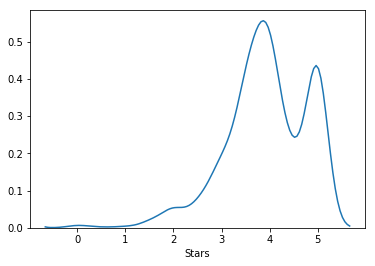

In [77]:
hof_subset = ramen[ramen['Brand'].isin(hof_brand)]
sns.distplot(hof_subset['Stars'], hist=False)

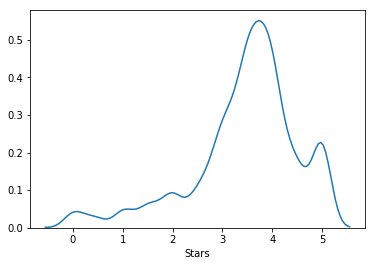

In [78]:
non_hof_subset = ramen[ramen['Brand'].isin(non_hof_brand)]
sns.distplot(non_hof_subset['Stars'], hist=False)

Based on the average number of products between hof brands and non-hof brands (with hof-brands being 14x more experimental than non-hof brands) and the distribution of their star ratings, we can safely say more experimental brands come up with better products, minimizing their 'failed' experiments and continuously improving product quality as they go along.

### Variety

Values in `Variety` are mostly unique and therefore would have little to no predictive power. We'll isolate this so we can refer back if needed.

In [79]:
ramen_var = ramen['Variety'] 
ramen = ramen.drop(['Variety'], axis=1)

### Style

In [80]:
#Check if samples are more or less balanced
ramen['Style'].value_counts()

Pack    1533
Bowl     481
Cup      450
Tray     108
Box        6
Name: Style, dtype: int64

In [81]:
ramen.groupby('Style')['Stars'].mean()

Style
Bowl    3.670686
Box     4.291667
Cup     3.498500
Pack    3.699937
Tray    3.545139
Name: Stars, dtype: float64

In [82]:
style_stars = df.loc[:,['Style', 'Stars']]

### Country

In [83]:
#Ave stars of countries in hof
hof.groupby('Country')['Stars'].mean()

Country
China          5.000000
Hong Kong      4.500000
Indonesia      4.875000
Japan          4.708333
Malaysia       5.000000
Myanmar        5.000000
Singapore      5.000000
South Korea    4.950000
Taiwan         5.000000
Thailand       5.000000
USA            5.000000
Name: Stars, dtype: float64

In [84]:
#Create a bool column if country is in hof
ramen['Hof Country'] = ramen['Country'].\
apply(lambda x: True if x in hof_country else False)

ramen.head()

,Brand,Style,Country,Stars,Top Ten,Hof Brand,Hof Country
Review #,,,,,,,
2580,NEW TOUCH,Cup,Japan,3.75,False,False,True
2579,JUST WAY,Pack,Taiwan,1.00,False,False,True
2578,NISSIN,Cup,USA,2.25,False,True,True
2577,WEI LIH,Pack,Taiwan,2.75,False,False,True
2576,CHING'S SECRET,Pack,India,3.75,False,False,False


In [85]:
ramen.groupby('Hof Country')['Stars'].mean()

Hof Country
False    3.200429
True     3.754334
Name: Stars, dtype: float64

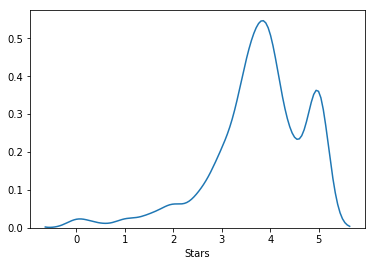

In [86]:
#Plot distribution of hof countries
sns.distplot(ramen[ramen['Hof Country']==True]['Stars'], hist=False)

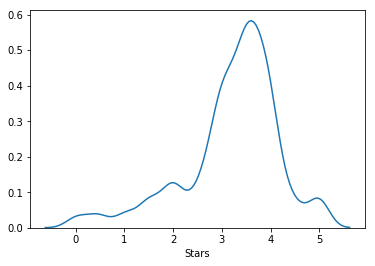

In [87]:
sns.distplot(ramen[ramen['Hof Country']==False]['Stars'], hist=False)

Average and distribution of star ratings show that there are countries that really make bettern ramen noodles.

### Continent
We will base the values on another dataset available [here](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#data). It cointais a list of countries and the continents they belong to.

In [88]:
continents = pd.read_csv('country-and-continent.csv').iloc[:,[0,2]]
continents.head()

,Continent_Name,Country_Name
0,Asia,"Afghanistan, Islamic Republic of"
1,Europe,"Albania, Republic of"
2,Antarctica,Antarctica (the territory South of 60 deg S)
3,Africa,"Algeria, People's Democratic Republic of"
4,Oceania,American Samoa


In [89]:
#Use for loop to get continent names
cont_dict = {}
for country in all_countries:
    cont_dict[country] = continents['Continent_Name']\
    [continents['Country_Name'].str.contains(country)].tolist()
    cont_dict[country]

cont_dict

{'Australia': ['Oceania'],
 'Bangladesh': ['Asia'],
 'Brazil': ['South America'],
 'Cambodia': ['Asia'],
 'Canada': ['North America'],
 'China': ['Asia', 'Asia', 'Asia'],
 'Colombia': ['South America'],
 'Dubai': [],
 'Estonia': ['Europe'],
 'Fiji': ['Oceania'],
 'Finland': ['Europe'],
 'Germany': ['Europe'],
 'Ghana': ['Africa'],
 'Holland': [],
 'Hong Kong': ['Asia'],
 'Hungary': ['Europe'],
 'India': ['Asia', 'Asia'],
 'Indonesia': ['Asia'],
 'Japan': ['Asia'],
 'Malaysia': ['Asia'],
 'Mexico': ['North America'],
 'Myanmar': ['Asia'],
 'Nepal': ['Asia'],
 'Netherlands': ['Europe', 'North America', 'North America'],
 'Nigeria': ['Africa'],
 'Pakistan': ['Asia'],
 'Philippines': ['Asia'],
 'Poland': ['Europe'],
 'Singapore': ['Asia'],
 'South Korea': [],
 'Sweden': ['Europe'],
 'Taiwan': ['Asia'],
 'Thailand': ['Asia'],
 'UK': [],
 'USA': [],
 'Vietnam': ['Asia']}

Some countries did not pick up respective continents from the list while some picked up multiple values. We'll assign manually instead.

In [90]:
#Countries with no assigned continent
cont_dict['Dubai'] = ['Asia']
cont_dict['Holland'] = ['Europe']
cont_dict['South Korea'] = ['Asia']
cont_dict['UK'] = ['Europe']
cont_dict['USA'] = ['North America']

In [91]:
#View source of error
continents[continents['Country_Name'].str.contains('China')]

,Continent_Name,Country_Name
45,Asia,"China, People's Republic of"
103,Asia,"Hong Kong, Special Administrative Region of China"
133,Asia,"Macao, Special Administrative Region of China"


In [92]:
continents[continents['Country_Name'].str.contains('Netherlands')]

,Continent_Name,Country_Name
155,Europe,"Netherlands, Kingdom of the"
156,North America,Netherlands Antilles
159,North America,Sint Maarten (Netherlands)


In [93]:
#Assign values
cont_dict['China'] = ['Asia']
cont_dict['Netherlands'] = ['Europe']

In [94]:
cont_dict

{'Australia': ['Oceania'],
 'Bangladesh': ['Asia'],
 'Brazil': ['South America'],
 'Cambodia': ['Asia'],
 'Canada': ['North America'],
 'China': ['Asia'],
 'Colombia': ['South America'],
 'Dubai': ['Asia'],
 'Estonia': ['Europe'],
 'Fiji': ['Oceania'],
 'Finland': ['Europe'],
 'Germany': ['Europe'],
 'Ghana': ['Africa'],
 'Holland': ['Europe'],
 'Hong Kong': ['Asia'],
 'Hungary': ['Europe'],
 'India': ['Asia', 'Asia'],
 'Indonesia': ['Asia'],
 'Japan': ['Asia'],
 'Malaysia': ['Asia'],
 'Mexico': ['North America'],
 'Myanmar': ['Asia'],
 'Nepal': ['Asia'],
 'Netherlands': ['Europe'],
 'Nigeria': ['Africa'],
 'Pakistan': ['Asia'],
 'Philippines': ['Asia'],
 'Poland': ['Europe'],
 'Singapore': ['Asia'],
 'South Korea': ['Asia'],
 'Sweden': ['Europe'],
 'Taiwan': ['Asia'],
 'Thailand': ['Asia'],
 'UK': ['Europe'],
 'USA': ['North America'],
 'Vietnam': ['Asia']}

In [95]:
#Add a column in df
ramen['Continent'] = ramen['Country'].apply(lambda x: 'Asian' if cont_dict[x]==['Asia'] else 'Non-Asian')

ramen.head()

,Brand,Style,Country,Stars,Top Ten,Hof Brand,Hof Country,Continent
Review #,,,,,,,,
2580,NEW TOUCH,Cup,Japan,3.75,False,False,True,Asian
2579,JUST WAY,Pack,Taiwan,1.00,False,False,True,Asian
2578,NISSIN,Cup,USA,2.25,False,True,True,Non-Asian
2577,WEI LIH,Pack,Taiwan,2.75,False,False,True,Asian
2576,CHING'S SECRET,Pack,India,3.75,False,False,False,Non-Asian


In [96]:
ramen.groupby('Continent')['Stars'].mean()

Continent
Asian        3.758234
Non-Asian    3.307521
Name: Stars, dtype: float64

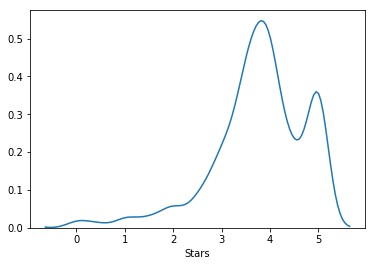

In [97]:
#Plot distribution of asian countries
sns.distplot(ramen[ramen['Continent']=='Asian']['Stars'], hist=False)

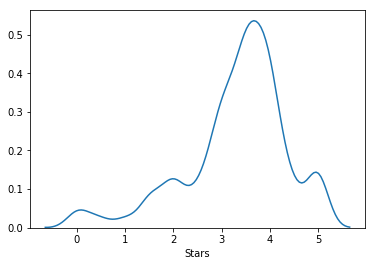

In [98]:
#Plot distribution of non-asian countries
sns.distplot(ramen[ramen['Continent']!='Asian']['Stars'], hist=False)

Both means and distributions show that Asian countries come up with better ramen products.

### Stars

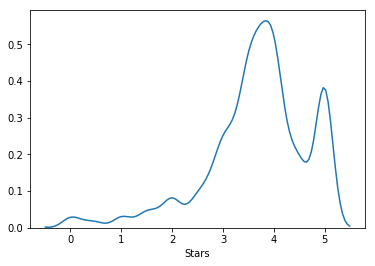

In [99]:
#Plot distribution
sns.distplot(ramen['Stars'], hist=False)

In [100]:
#Quantify Skewness and Kurtosis
print('Skewness: %f' % ramen['Stars'].skew())
print('Kurtosis: %f' % ramen['Stars'].kurt())

Skewness: -1.081401
Kurtosis: 1.739753


Data is skewed and there are outliers in the data. Ideally, we he have a distribution close to normal. We can do this by reducing observations in the left tail.

In [101]:
print('At threshold 2.0, we have %d outliers.' % ramen['Stars'][ramen['Stars'] < 2].count())

At threshold 2.0, we have 157 outliers.


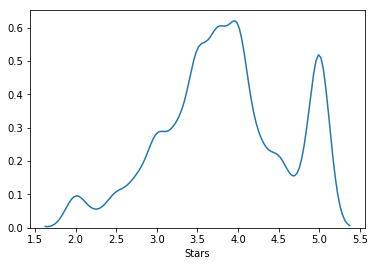

In [102]:
#Removing outliers
ramen = ramen[ramen['Stars'] >= 2]
shape_x, shape_y = ramen.shape

#Plot distribution
sns.distplot(ramen['Stars'], hist=False)

In [103]:
#Quantify new Skewness and Kurtosis
print('Skewness: %f' % ramen['Stars'].skew())
print('Kurtosis: %f' % ramen['Stars'].kurt())

Skewness: -0.184440
Kurtosis: -0.381480


Both Skewness and Kurtosis are now closer to 0. This means the distribution is now closer to normal.

## Phase 4: Insights

### 1. What are the best brands of instant ramen?
The answer would be different based on what matters more to reader.

**Bonus info:** More experimental brands come up with the best-received products.

#### Top brands based on stars

In [104]:
brand_stars.head()

Brand
THE RAMEN RATER SELECT    5.0
TORISHI                   5.0
KIMURA                    5.0
DAIFUKU                   5.0
DADDY                     5.0
Name: Stars, dtype: float64

#### Top brands based on hall of fame

In [105]:
brand_top.head()

Brand
PRIMA TASTE    5.0
MAMA           4.0
MYKUALI        3.0
INDOMIE        3.0
NONGSHIM       3.0
Name: Top Ten, dtype: float64

### 2. Due to higher demand, do Asian brands make better products?
Yes, products from Asian countries are better-rated than others.

#### Ratings for Asian countries

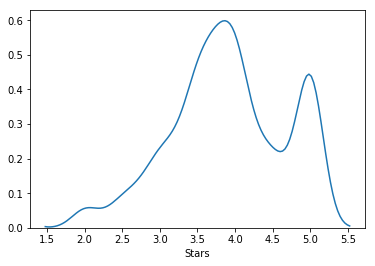

In [106]:
sns.distplot(ramen[ramen['Continent']=='Asian']['Stars'], hist=False)

#### Ratings for non-Asian countries

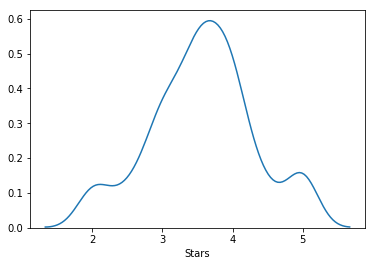

In [107]:
#Plot distribution of asian countries
sns.distplot(ramen[ramen['Continent']!='Asian']['Stars'], hist=False)

### 3. Does packaging affect the experience of eating?
Average star rating for products in boxes are higher than the rest. However, samples are not balanced so this may not be entirely accurate.

In [108]:
ramen.groupby('Style')['Stars'].mean()

Style
Bowl    3.866036
Box     4.850000
Cup     3.688126
Pack    3.854039
Tray    3.776515
Name: Stars, dtype: float64

### 4. Is it easy enough to find high quality ramen?
Yes, the distribution has a longer tail on the left, meaning there are fewer cases of 'bad' product than 'good'. Most samples are near 4 star rating.

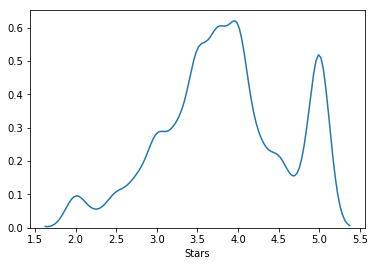

In [109]:
sns.distplot(ramen['Stars'], hist=False)

## Phase 5: Building test classifiers
Four models will be used:
1. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [KNN Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
4. [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Accuracy scores will be compared at the end.

### Preprocess data for modelling

#### Dropping unnecessary columns

In [110]:
ramen = ramen.drop(columns=['Hof Brand', 'Hof Country', 'Continent'], axis=1)
ramen.head()

,Brand,Style,Country,Stars,Top Ten
Review #,,,,,
2580,NEW TOUCH,Cup,Japan,3.75,False
2578,NISSIN,Cup,USA,2.25,False
2577,WEI LIH,Pack,Taiwan,2.75,False
2576,CHING'S SECRET,Pack,India,3.75,False
2575,SAMYANG,Pack,South Korea,4.75,False


In [111]:
ramen.shape

(2421, 5)

#### Isolate target from predictor features

In [112]:
ramen_x = ramen.drop('Top Ten', axis=1)
ramen_y = ramen['Top Ten']

#Confirm changed dimensions
print(ramen_x.shape, ramen_y.shape)

((2421, 4), (2421,))


#### Transform categorical features
Machines can only understand data reduced into numbers. To prepare data for modelling, we need to convert categorical features (ie: `Brand`) to numeric.

In [113]:
#Convert categories to numbers with LabelEncoder
le = LabelEncoder()
ramen_x['Brand'] = le.fit_transform(ramen_x['Brand'])
ramen_x['Style'] = le.fit_transform(ramen_x['Style'])
ramen_x['Country'] = le.fit_transform(ramen_x['Country'])

In [114]:
#Confim transformation of values
ramen_x.head()

,Brand,Style,Country,Stars
Review #,,,,
2580,172,2,18,3.75
2578,174,2,33,2.25
2577,301,3,30,2.75
2576,34,3,16,3.75
2575,224,3,28,4.75


All features are now encoded as numbers.

#### Scale data

In [115]:
#Get max values per column
for col in ramen_x.columns:
    print('Max value in col %s is %s' % (col, ramen_x[col].max()))

Max value in col Brand is 315
Max value in col Style is 4
Max value in col Country is 34
Max value in col Stars is 5.0


We want the features to be on the same range so that the machine will not be biased towards bigger numbers. In this case, `Brand`'s max value is 315 (because it just counted unique brands), way off from max values in others.

<br/>

We are using MinMaxScaler to do this. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1].

<br/>

More info [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [116]:
#Scale data
scaler = MinMaxScaler()
scaler.fit(ramen_x)
ramen_scaled_x = scaler.transform(ramen_x)

#Create a new df with scaled data
ramen_scaled_x = pd.DataFrame(ramen_scaled_x, 
                              index=ramen_x.index.copy(), 
                              columns=ramen_x.columns.copy())

#Inspect new df
ramen_scaled_x.head()

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Brand,Style,Country,Stars
Review #,,,,
2580,0.546032,0.50,0.529412,0.583333
2578,0.552381,0.50,0.970588,0.083333
2577,0.955556,0.75,0.882353,0.250000
2576,0.107937,0.75,0.470588,0.583333
2575,0.711111,0.75,0.823529,0.916667


#### Split dataset to train-test sets
Train set - used to 'teach' the machine to classify
Test set - used to test how good the classifier is

In [117]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(ramen_scaled_x, ramen_y, 
                                                    test_size=0.5, 
                                                    random_state=1)

In [118]:
#Check if split is successful
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((1210, 4), (1211, 4), (1210,), (1211,))


#### Prepare df to store accuracy scores

In [119]:
scores = pd.DataFrame(index=['logreg', 'knn', 'gnb', 'clf'], 
                      columns=['Cross Val', 'Accuracy', 'True Positive'])

scores

,Cross Val,Accuracy,True Positive
logreg,NaN,NaN,NaN
knn,NaN,NaN,NaN
gnb,NaN,NaN,NaN
clf,NaN,NaN,NaN


### Logistic Regression

#### Train the model

In [120]:
#Instantiate the Algorithm 
#Using `balanced` for class_weight bec observations are unequal 
#(more hof than non-hof samples)
logreg = LogisticRegression(C=1e9, class_weight="balanced", 
                            solver='liblinear', random_state=25)

#Train the algorithm
logreg.fit(x_train, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [121]:
#Create a df for easy understanding
coef = pd.DataFrame(x_train.columns, columns=["Features"])
coef['Coef'] = logreg.coef_.reshape(-1,1)
coef['Coef'] = coef['Coef'].apply(np.abs)
coef

,Features,Coef
0,Brand,0.928690
1,Style,10.949954
2,Country,0.699525
3,Stars,17.817794


The table above shows how much the features affect the models prediction. The stronger features are `Style` and `Stars`.

#### Test the model

In [122]:
#Make predictions
y_pred = logreg.predict(x_test)

In [123]:
#Get the confusion matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

       False       1.00      0.89      0.94      1188
        True       0.13      0.87      0.22        23

   micro avg       0.89      0.89      0.89      1211
   macro avg       0.56      0.88      0.58      1211
weighted avg       0.98      0.89      0.92      1211




Text(0.5,24,'Predicted label')

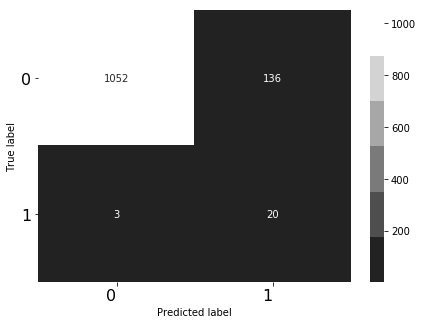

In [124]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (7,5))
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", 
                      cmap=sns.dark_palette('#ffffff'))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [125]:
#Add scores to df
scores.iloc[0][0] = cross_val_score(logreg, ramen_scaled_x, ramen_y, cv=5).mean()
scores.iloc[0][1] = acc_score = accuracy_score(y_test,y_pred)
scores.iloc[0][2] = tp = cm[1][1]

scores

,Cross Val,Accuracy,True Positive
logreg,0.867074,0.885219,20
knn,NaN,NaN,NaN
gnb,NaN,NaN,NaN
clf,NaN,NaN,NaN


### K Nearest Neighbors

#### Train the model

In [126]:
#Set the value of K
k = 3

#Instatiate the algorithm
knn = KNeighborsClassifier(n_neighbors=k)

#Train the algorithm
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

#### Test the model

In [127]:
#Make predictions
y_pred = knn.predict(x_test)

In [128]:
#Get the confusion matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1188
        True       0.00      0.00      0.00        23

   micro avg       0.98      0.98      0.98      1211
   macro avg       0.49      0.50      0.49      1211
weighted avg       0.96      0.98      0.97      1211




Text(0.5,24,'Predicted label')

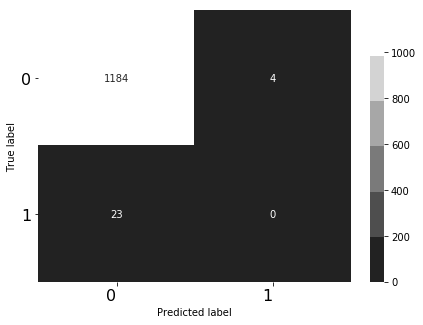

In [129]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (7,5))
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", 
                      cmap=sns.dark_palette('#ffffff'))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [130]:
#Add scores to df
scores.iloc[1][0] = cross_val_score(knn, ramen_scaled_x, ramen_y, cv=5).mean()
scores.iloc[1][1] = acc_score = accuracy_score(y_test,y_pred)
scores.iloc[1][2] = tp = cm[1][1]

scores

,Cross Val,Accuracy,True Positive
logreg,0.867074,0.885219,20
knn,0.98059,0.977704,0
gnb,NaN,NaN,NaN
clf,NaN,NaN,NaN


### Naive Bayes

#### Train the model

In [131]:
#Instantiate the algorithm 
gnb = GaussianNB()

#Train the algorithm
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Test the model

In [132]:
#Make predictions
y_pred = gnb.predict(x_test)

In [133]:
#Get the confusion matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (gnb, classification_report(y_test, y_pred)))

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

       False       0.99      0.88      0.93      1188
        True       0.10      0.65      0.17        23

   micro avg       0.88      0.88      0.88      1211
   macro avg       0.54      0.77      0.55      1211
weighted avg       0.98      0.88      0.92      1211




Text(0.5,24,'Predicted label')

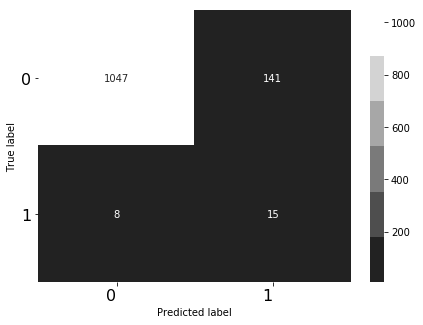

In [134]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (7,5))
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", 
                      cmap=sns.dark_palette('#ffffff'))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [135]:
#Add scores to df
scores.iloc[2][0] = cross_val_score(gnb, ramen_scaled_x, ramen_y, cv=5).mean()
scores.iloc[2][1] = acc_score = accuracy_score(y_test,y_pred)
scores.iloc[2][2] = tp = cm[1][1]

scores

,Cross Val,Accuracy,True Positive
logreg,0.867074,0.885219,20
knn,0.98059,0.977704,0
gnb,0.958307,0.876961,15
clf,NaN,NaN,NaN


### Decision Tree

#### Train the model

In [136]:
#Instantiate the algorithm
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=3, 
                                  min_samples_leaf=5, max_depth=5, 
                                  random_state=25)

#Train the algorithm
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

#### Test the model

In [137]:
#Make predictions
y_pred = clf.predict(x_test)

In [138]:
#Get the confusion matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'):
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1188
        True       0.00      0.00      0.00        23

   micro avg       0.98      0.98      0.98      1211
   macro avg       0.49      0.50      0.49      1211
weighted avg       0.96      0.98      0.97      1211




Text(0.5,24,'Predicted label')

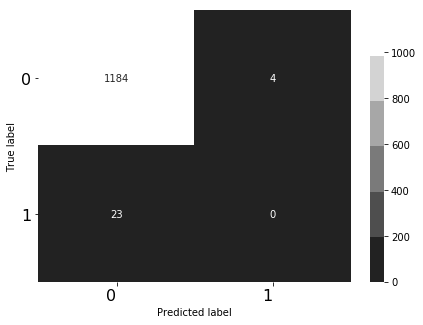

In [139]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (7,5))
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", 
                      cmap=sns.dark_palette('#ffffff'))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Compare scores between models

In [140]:
#Add scores to df
scores.iloc[3][0] = cross_val_score(clf, ramen_scaled_x, ramen_y, cv=5).mean()
scores.iloc[3][1] = acc_score = accuracy_score(y_test,y_pred)
scores.iloc[3][2] = tp = cm[1][1]

scores

,Cross Val,Accuracy,True Positive
logreg,0.867074,0.885219,20
knn,0.98059,0.977704,0
gnb,0.958307,0.876961,15
clf,0.983894,0.977704,0


While **knn** and **clf** have the best cross val and accuracy scores, both never got any True Positives-- which is more important to us. **logreg** has the most True Positives

<br/>

For the next part, we're tweaking the logreg model to see if true positives can be improved.

## Phase 6: Improve logreg model
The previous logreg model already has a good true positive rate at 20/23. Using ensemble methods, we can play with different values for the parameters and get the best values possible.

### Grid Search

In [141]:
#Create a dictionary of logreg() parameters to be used for grid search
param_grid = {'C' : np.arange(1e8, 1e10, 1e9), 
              'solver' : ['liblinear', 'saga'], 
              'random_state' : range(20, 30, 2)}

In [142]:
#Set the parameters of the GridSearchCV
#grid search will test all parameters
grid_search = GridSearchCV(LogisticRegression(), 
                           param_grid=param_grid, 
                           cv=5)

In [143]:
#Create the pipeline with grid_search as the Classifier
model = Pipeline([('scaler', scaler),('logreg', grid_search)])

In [144]:
#Fit dataset to pipeline
model.fit(ramen_x, ramen_y)

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The ma

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('logreg', GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))])

In [145]:
#Get steps done by the search
gs = model.steps[1][1]

In [146]:
#Move gs to a dataframe and get top 5 set of parameters
top_params = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').\
iloc[:, 3:7].head()
top_params = top_params.reset_index()

#Rearange columns
top_params['true_positives'] = ''
cols = top_params.columns.tolist()
cols = cols[-1:] + cols[:-1]
top_params = top_params[cols]

top_params

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Applications/anaconda2/lib/pyt

,true_positives,index,mean_train_score,param_C,param_random_state,param_solver
0,,0,0.984717,1e+08,20,liblinear
1,,72,0.984717,7.1e+09,22,liblinear
2,,71,0.984717,7.1e+09,20,saga
3,,70,0.984717,7.1e+09,20,liblinear
4,,69,0.984717,6.1e+09,28,saga


### Best parameters for logreg model

In [147]:
#Loop over parameters to get true positives
for index in range(5):
    row = top_params.iloc[index,:]
    C_param = row[3]
    random_state_param = row[4]
    solver_param = row[5]
    logreg = LogisticRegression(C=C_param, 
                                      class_weight="balanced", 
                                      solver=solver_param, 
                                      random_state=random_state_param)
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    top_params.at[index, 'true_positives'] = cm[1][1]
    
top_params = top_params.drop(columns=['index'], axis=1) ; top_params

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Applications/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,true_positives,mean_train_score,param_C,param_random_state,param_solver
0,20,0.984717,1e+08,20,liblinear
1,20,0.984717,7.1e+09,22,liblinear
2,20,0.984717,7.1e+09,20,saga
3,20,0.984717,7.1e+09,20,liblinear
4,0,0.984717,6.1e+09,28,saga


The best 4 results of grid search has the same mean_train_score and true_positives. **While the differences are small, index 1 has the parameters to create the best model to classify which ramen products are more likely to be among theramenrater's yearly Top Ten at least once.**

### Final model

In [148]:
#Instantiate the Algorithm 
logreg = LogisticRegression(C=1e+08, class_weight="balanced", 
                            solver='liblinear', random_state=20)

#Train the algorithm
logreg.fit(x_train, y_train)

LogisticRegression(C=100000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=20,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [149]:
#Examine coefficients that drive the model
coef = pd.DataFrame(x_train.columns, columns=["Features"])
coef['Coef'] = logreg.coef_.reshape(-1,1)
coef['Coef'] = coef['Coef'].apply(np.abs)
coef

,Features,Coef
0,Brand,0.928690
1,Style,10.949954
2,Country,0.699525
3,Stars,17.817794


In [150]:
#Make predictions
y_pred = logreg.predict(x_test)

In [151]:
#Get the confusion matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=100000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=20,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

       False       1.00      0.89      0.94      1188
        True       0.13      0.87      0.22        23

   micro avg       0.89      0.89      0.89      1211
   macro avg       0.56      0.88      0.58      1211
weighted avg       0.98      0.89      0.92      1211




Text(0.5,24,'Predicted label')

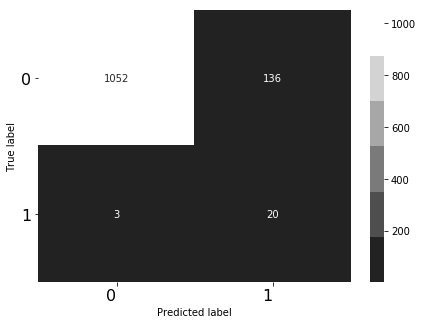

In [152]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (7,5))
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", 
                      cmap=sns.dark_palette('#ffffff'))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                             rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 5. Can we classify whether a product is in the ramen hall of fame?
Yes, especially using a logistic regression model. Changing the parameters did not really improve the model. However, it remains that this one can correctly classify 20/23 or 87% of the products in the hall of fame.